# 理論

ヒストグラムとは、<b>画像中の画素値の全体的な分布を知るためのグラフやプロット</b>と考えることができる．横軸に画素値(大抵の場合0から255の値を持つ)，縦軸に画素値の出現頻度をプロットしたものである．ヒストグラムをこのように可視化することは、画像を理解する一つの方法である．ヒストグラムを見れば画像のコントラスト，明るさ，画素値の分布などが直観的に理解できるからである．今日利用できる画像処理ソフトのほとんどがヒストグラムに関する機能を持っている．次に示す画像は Cambridge in Color website から取り出したものの1枚である．詳細についてはサイトを参照すること．

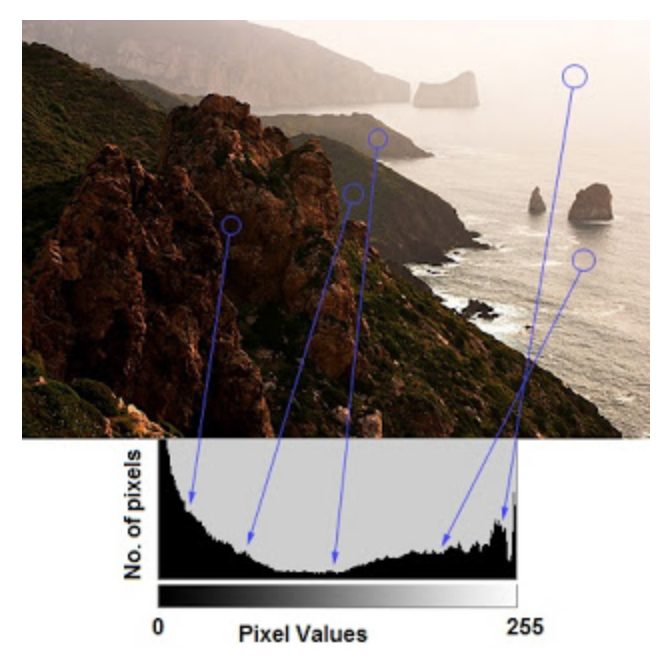

画像とそのヒストグラムを比べてみよう(このヒストグラムはグレースケール画像のヒストグラムであり，カラー画像のヒストグラムではないことに注意)．ヒストグラムの左側の領域は画像の中の暗い画素の出現頻度，右側の領域は画像の中の明るい画素の出現頻度を表している．このヒストグラムから、この画像は暗い領域の方が多いことや、画素値の中間領域(ここでは127付近)の画素はほとんどないことなどが分かる．



In [11]:
import numpy as np
import cv2 # OpenCV-Python
import pandas as pd
from pandas import Series
%matplotlib inline
import matplotlib.pyplot as plt


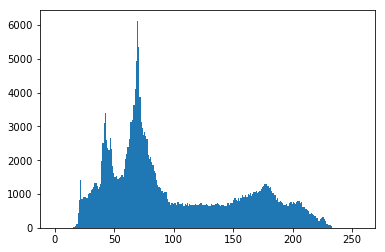

In [12]:
img = cv2.imread('../../img/hari.jpg',0)
hist = cv2.calcHist([img],[0],None,[256],[0,256])

plt.hist(img.ravel(),256,[0,256]); plt.show()

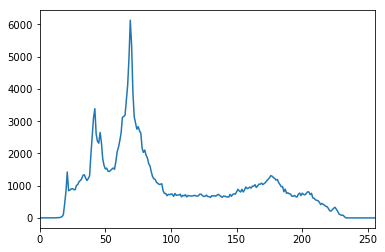

In [14]:
hist,bins = np.histogram(img.ravel(),256,[0,256])

Series(hist).plot()

# ヒストグラムの可視化

## 1. Matplotlibを使う

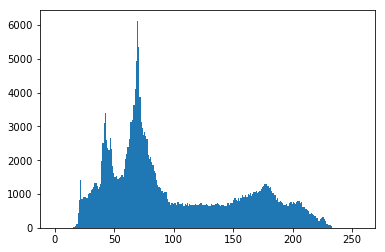

In [15]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('../../img/hari.jpg',0)
plt.hist(img.ravel(),256,[0,256]); plt.show()

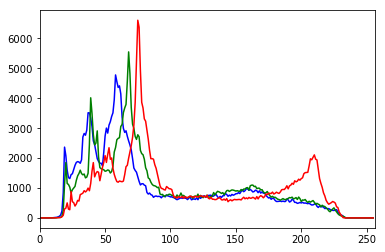

In [16]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('../../img/hari.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()


## 2. OpenCVを使う

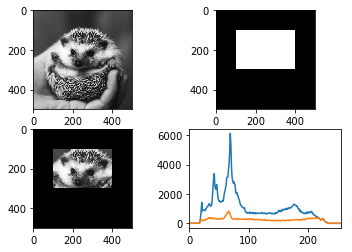

In [17]:
img = cv2.imread('../../img/hari.jpg',0)

# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)

# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])

plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])

plt.show()